#  Exercise 8 | Collaborative Filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.optimize

In [2]:
def numerical_gradient(f, x, dx=1e-6):
    perturb = np.zeros(x.size)
    result  = np.zeros(x.size)
    for i in range(x.size):
        perturb[i] = dx
        result[i] = (f(x+perturb) - f(x-perturb)) / (2*dx)
        perturb[:] = 0
    return result

In [3]:
%matplotlib inline
#%qtconsole

##  Part 1: Loading movie ratings dataset 
  You will start by loading the movie ratings dataset to understand the
  structure of the data.
  

In [4]:
ex8_movies = scipy.io.loadmat('ex8_movies.mat')
Y = ex8_movies['Y']
R = ex8_movies['R'].astype(bool)
print(Y.shape, R.shape)

(1682, 943) (1682, 943)


  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
  943 users.

  R is a 1682x943 matrix, where R[i,j] = 1 if and only if user j gave a
  rating to movie i.
  
From the matrix, we can compute statistics like average rating.

Average rating for movie 1 (Toy Story):

In [5]:
np.mean(Y[0, R[0, :]])

3.8783185840707963

  We can "visualize" the ratings matrix by plotting it as an image.

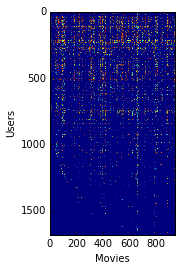

In [6]:
plt.imshow(Y)
plt.xlabel('Movies')
plt.ylabel('Users')

## Part 2: Collaborative Filtering Cost Function 
  You will now implement the cost function for collaborative filtering.
  To help you debug your cost function, we have included set of weights
  that we trained on that. Specifically, you should complete the code in 
  cofi_cost_function to return J.

In [7]:
movieParams = scipy.io.loadmat('ex8_movieParams.mat')
Theta = movieParams['Theta']
num_movies = movieParams['num_movies']
X = movieParams['X']
num_features = movieParams['num_features']
num_users = movieParams['num_users']

In [8]:
num_users = 4
num_movies = 5
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

In [9]:
def cofi_cost_function(params, Y, R, num_users, num_movies, num_features, lambda_):
    #COFICOSTFUNC Collaborative filtering cost function
    #   [J, grad] = COFICOSTFUNC(params, Y, R, num_users, num_movies, ...
    #   num_features, lambda) returns the cost and gradient for the
    #   collaborative filtering problem.
    #
    
    # Unfold the U and W matrices from params
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    
    # You need to return the following values correctly
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost function and gradient for collaborative
    #               filtering. Concretely, you should first implement the cost
    #               function (without regularization) and make sure it is
    #               matches our costs. After that, you should implement the 
    #               gradient and use the checkCostFunction routine to check
    #               that the gradient is correct. Finally, you should implement
    #               regularization.
    #
    # Notes: X - num_movies  x num_features matrix of movie features
    #        Theta - num_users  x num_features matrix of user features
    #        Y - num_movies x num_users matrix of user ratings of movies
    #        R - num_movies x num_users matrix, where R(i, j) = 1 if the 
    #            i-th movie was rated by the j-th user
    #
    # You should set the following variables correctly:
    #
    #        X_grad - num_movies x num_features matrix, containing the 
    #                 partial derivatives w.r.t. to each element of X
    #        Theta_grad - num_users x num_features matrix, containing the 
    #                     partial derivatives w.r.t. to each element of Theta
    #

    
    
    
    
    
    
    
    
    
    # =============================================================
    
    grad = np.r_[X_grad.flat, Theta_grad.flat]
    return J, grad

The cost at the given parameters should be about `22.22`.

In [10]:
cofi_cost_function(np.r_[X.flat, Theta.flat], Y, R, num_users, num_movies, num_features, 0)[0]

22.224603725685675

In [ ]:
def check_cost_function(lambda_=0):
    X = np.random.rand(4, 3)
    Theta = np.random.rand(5, 3)
    Y = X.dot(Theta.T)
    Y[np.random.rand(*Y.shape) > 0.5] = 0
    R = np.zeros(Y.shape).astype(bool)
    R[Y != 0] = True
    
    X = np.random.rand(4, 3)
    Theta = np.random.rand(5, 3)
    
    num_users = Y.shape[1]
    num_movies = Y.shape[0]
    num_features = Theta.shape[1]
    
    def cost(params):
        return cofi_cost_function(params, Y, R, num_users, num_movies, num_features, lambda_)[0]
    
    num_grad = numerical_gradient(cost, np.r_[X.flat, Theta.flat])
    
    cost, grad = cofi_cost_function(np.r_[X.flat, Theta.flat], Y, R, num_users, num_movies, num_features, lambda_)
    print(np.c_[num_grad, grad])
    print('Average difference:', np.mean((num_grad - grad) ** 2))

## Part 3: Collaborative Filtering Gradient 
  Once your cost function matches up with ours, you should now implement 
  the collaborative filtering gradient function. Specifically, you should 
  complete the code in cofi_cost_function to return the grad argument.

In [11]:
check_cost_function()

[[ 0.26233992  0.26233992]
 [ 0.34004842  0.34004842]
 [ 0.77307144  0.77307144]
 [ 0.14390212  0.14390212]
 [ 0.21182446  0.21182446]
 [ 0.28184456  0.28184456]
 [-0.16031192 -0.16031192]
 [-0.01755697 -0.01755697]
 [-0.1437886  -0.1437886 ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.18200599 -0.18200599]
 [-0.10335927 -0.10335927]
 [-0.16118091 -0.16118091]
 [ 0.30599754  0.30599754]
 [ 0.54433712  0.54433712]
 [ 0.20047859  0.20047859]
 [ 0.48236424  0.48236424]
 [ 0.59839217  0.59839217]
 [ 0.41625749  0.41625749]
 [-0.18662571 -0.18662571]
 [-0.26339848 -0.26339848]
 [-0.14874371 -0.14874371]]
Average difference: 9.21891081215e-22


## Part 4: Collaborative Filtering Cost Regularization 
Now, you should implement regularization for the cost function for 
  collaborative filtering. You can implement it by adding the cost of
  regularization to the original cost computation.


Regularized cost function. The cost at the given parameters with $\lambda=1.5$ should be about 31.34:

In [12]:
cofi_cost_function(np.r_[X.flat, Theta.flat], Y, R, num_users, num_movies, num_features, 1.5)[0]

31.344056244274221

## Part 5: Collaborative Filtering Gradient Regularization 
  Once your cost matches up with ours, you should proceed to implement 
  regularization for the gradient. 



In [13]:
check_cost_function(1.5)

[[ 0.88510667  0.88510667]
 [ 0.19572469  0.19572469]
 [ 1.23173802  1.23173802]
 [ 1.52966029  1.52966029]
 [ 1.1434854   1.1434854 ]
 [ 0.04680726  0.04680726]
 [-0.15002989 -0.15002989]
 [-0.8223339  -0.8223339 ]
 [-1.11357585 -1.11357585]
 [ 1.52238386  1.52238386]
 [ 0.35163718  0.35163718]
 [ 1.34544414  1.34544414]
 [-0.56909746 -0.56909746]
 [-0.80613555 -0.80613555]
 [ 0.33188132  0.33188132]
 [-0.93744682 -0.93744682]
 [-0.16473905 -0.16473905]
 [-0.63408437 -0.63408437]
 [ 0.43669555  0.43669555]
 [ 0.44238754  0.44238754]
 [ 1.09742569  1.09742569]
 [ 1.34583256  1.34583256]
 [ 0.9641857   0.9641857 ]
 [ 1.87647586  1.87647586]
 [ 0.44668088  0.44668088]
 [ 1.09147953  1.09147953]
 [ 0.9587716   0.9587716 ]]
Average difference: 2.04044142403e-19


##  Part 6: Entering ratings for a new user 
  Before we will train the collaborative filtering model, we will first
  add ratings that correspond to a new user that we just observed. This
  part of the code will also allow you to put in your own ratings for the
  movies in our dataset!


In [14]:
with open('movie_ids.txt', encoding='latin1') as f:
    movies = [line.strip().split(' ', 1)[1] for line in f]

len(movies)

1682

 We have selected a few movies we liked / did not like and the ratings we
 gave are as follows:

In [ ]:
ratings = {1: 4, 98: 2, 7: 3, 12: 5, 54: 4, 64: 5, 66: 3, 69: 5, 183: 4, 226: 5, 355: 5}

 For example, Toy Story (1995) has ID 1, and we rated it 4.

In [15]:
my_ratings = np.zeros(1682)
for k, v in ratings.items():
    my_ratings[k-1] = v

for i, v in enumerate(my_ratings):
    if v != 0:
        print('Rated {} for {}'.format(v, movies[i]))

Rated 4.0 for Toy Story (1995)
Rated 3.0 for Twelve Monkeys (1995)
Rated 5.0 for Usual Suspects, The (1995)
Rated 4.0 for Outbreak (1995)
Rated 5.0 for Shawshank Redemption, The (1994)
Rated 3.0 for While You Were Sleeping (1995)
Rated 5.0 for Forrest Gump (1994)
Rated 2.0 for Silence of the Lambs, The (1991)
Rated 4.0 for Alien (1979)
Rated 5.0 for Die Hard 2 (1990)
Rated 5.0 for Sphere (1998)


## Part 7: Learning Movie Ratings 
  Now, you will train the collaborative filtering model on a movie rating 
  dataset of 1682 movies and 943 users



In [16]:
ex8_movies = scipy.io.loadmat('ex8_movies.mat')
Y = ex8_movies['Y']
R = ex8_movies['R'].astype(bool)
print(Y.shape, R.shape)

(1682, 943) (1682, 943)


  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
  943 users

  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
  rating to movie i

In [17]:
#  Add our own ratings to the data matrix
Y = np.c_[my_ratings, Y]
R = np.c_[my_ratings != 0, R]

print(Y.shape, R.shape)

(1682, 944) (1682, 944)


In [18]:
def normalize_ratings(Y, R):
    m, n = Y.shape
    Ymean = np.zeros(m)
    Ynorm = np.zeros(Y.shape)
    for i in range(m):
        idx = R[i, :]
        Ymean[i] = np.mean(Y[i, idx])
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]
    return Ynorm, Ymean

Ynorm, Ymean = normalize_ratings(Y, R)

In [19]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10
# Set Regularization
lambda_ = 10

# Set Initial Parameters
X = np.random.rand(num_movies, num_features)
Theta = np.random.rand(num_users, num_features)

initial_params = np.r_[X.flat, Theta.flat]

In [20]:
def cost(params):
    return cofi_cost_function(params, Y, R, num_users, num_movies, num_features, lambda_)

res = scipy.optimize.minimize(cost, initial_params, jac=True, method='L-BFGS-B', 
                              options=dict(maxiter=100, disp=True))

# Unfold the returned theta back into U and W

In [21]:
X = res.x[:num_movies*num_features].reshape(num_movies, num_features)
Theta = res.x[num_movies*num_features:].reshape(num_users, num_features)

In [22]:
p = X.dot(Theta.T)

In [23]:
my_predictions = p[:, 0] + Ymean
sorted_predictions = sorted(enumerate(my_predictions), key=lambda x: x[1], reverse=True)

print('\n'.join('Predicting rating {:.1f} for movie {}'.format(rating, movies[i])
               for i, rating in sorted_predictions[:10]))


Predicting rating 8.5 for movie Titanic (1997)
Predicting rating 8.4 for movie Star Wars (1977)
Predicting rating 8.4 for movie Shawshank Redemption, The (1994)
Predicting rating 8.3 for movie Schindler's List (1993)
Predicting rating 8.2 for movie Raiders of the Lost Ark (1981)
Predicting rating 8.1 for movie Usual Suspects, The (1995)
Predicting rating 8.1 for movie Good Will Hunting (1997)
Predicting rating 8.1 for movie Braveheart (1995)
Predicting rating 8.0 for movie Empire Strikes Back, The (1980)
Predicting rating 8.0 for movie Godfather, The (1972)
